In [20]:
# import sys  
# !{sys.executable} -m pip install scipy
from typing import Tuple
from math import sin, pi, e, log, sqrt
from scipy import integrate
import matplotlib.pyplot as plt

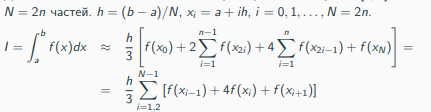

In [13]:
def evaluate(n: int, func, interval: Tuple[float, float]):
    N = 2 * n
    a, b = interval
    h = (b - a) / N

    integral = 0
    for i in range(1, N, 2):
        integral += func(a + (i - 1) * h) + 4 * \
            func(a + i * h) + func(a + (i + 1) * h)
    return h / 3 * integral
# 4, 3

In [25]:
def func1(x: float):
    if x == 0:
        return pi
    if x == 1:
        return 5 * pi
    return sin(pi * x ** 5) / (x ** 5 * (1 - x))


def func2(x: float):
    return e ** ((-1 * sqrt(x)) + sin(x / 10)) 

def x_t(t):
        return t/(1-t)

def f2_with_t(t):
    return func2(x_t(t))/(1-t)**2

In [15]:
def get_order(func, interval: Tuple[float, float], n: int, r: int):
    return (evaluate(n, func, interval) - evaluate(n * r, func, interval)) / ((1 / r) ** 4 - 1)

(0.5519799900565127, 6.665279439488359e-11)
0.5519800187595438
-0.0008769700912947569
-2.7791595660572565e-05
31.55522633552483
0.03169047147268284
-0.667079678119456


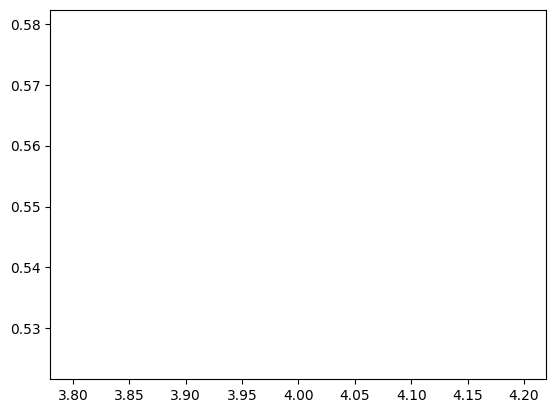

In [24]:
func = func2
ax, fig = plt.subplots()

x_values = []
y_values = []

for i in range(4, 5):
    x_values.append(i)
    y_values.append(evaluate(10 ** i, func, (0, 1)))
plt.plot(x_values, y_values)

print(integrate.quad(func, 0, 1))
print(evaluate(10**4, func, (0, 1)))
A = get_order(func, (0, 1), 10, 10)
B = get_order(func, (0, 1), 100, 10)
print(A)
print(B)
print(A/B)
print(B/A)
print(log(10, abs(B/A)))
plt.show()